Date Created: 11/18/20
## Goal of Notebook: General Phage Analysis
For this notebook I want to understand the sample of sequenced phages in the phagesDB dataset. This is important because we have an unequal characteristics among the phages.

In [1]:
import requests 
import pandas as pd
from random import sample 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys 
from networkx.algorithms import bipartite


In [98]:
df_genes = pd.read_csv("data/cleaned_gene_list.csv")
df_genes.head()

,gene ID,pham,function,translation,orientation,phage,gene number,uncleaned function
0,20ES_CDS_1,36676,NKF,MYGTRSSAFWASQPGKFDVLNLRMTFPSTSAHEIPDLTATDFVPEN...,F,20ES,1,NaN
1,20ES_CDS_10,39578,lysin b,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,F,20ES,10,lysin b
2,20ES_CDS_11,34196,terminase,MSLENHHPELAPSPPHIIGPSWQRTVDGSWHLPDPKMTLGWGVLKW...,F,20ES,11,terminase
3,20ES_CDS_12,39511,portal protein,MTAPLPGQEEIPDPAIARDEMISAFDDAVKNLKINTSYYEAERRPE...,F,20ES,12,portal protein
4,20ES_CDS_13,21454,capsid maturation protease,MITAAVAAYVQRFASMFTGPALSLGEWARFLQTLFPEVQRRYAQAA...,F,20ES,13,capsid maturation protease


In [102]:
df_genes["gene ID"].nunique()

348734

In [99]:
df_genes["translation"].nunique()

155704

In [100]:
df_genes["function"].nunique()

196

In [103]:
df_genes["uncleaned function"].nunique()

1668

In [101]:
df_genes["pham"].nunique()

23224

In [2]:
df_phages = pd.read_csv("data/phage_metadata.csv")
df_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
0,20ES,True,A,A2,SIPHO,Mycobacterium,smegmatis,53124.0,False,True,63.4
1,244,True,E,NaN,SIPHO,Mycobacterium,smegmatis,74483.0,True,True,63.4
2,32HC,True,Z,NaN,SIPHO,Mycobacterium,smegmatis,50781.0,False,True,65.7
3,39HC,False,B,B6,SIPHO,Mycobacterium,smegmatis,71565.0,False,True,70.0
4,40AC,True,A,A17,SIPHO,Mycobacterium,smegmatis,53396.0,False,True,63.3


In [3]:
df_annotated_phages = df_phages[df_phages["is annotated"]==True]
df_annotated_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
1,244,True,E,NaN,SIPHO,Mycobacterium,smegmatis,74483.0,True,True,63.4
6,Aaronocolus,True,BD,BD1,NaN,Streptomyces,griseus,49562.0,True,True,66.2
8,AbbeyMikolon,True,BL,NaN,SIPHO,Streptomyces,lividans,42551.0,True,True,66.8
11,ABCat,True,E,NaN,SIPHO,Mycobacterium,smegmatis,76131.0,True,True,63.0
12,Abdiel,True,A,A4,SIPHO,Mycobacterium,smegmatis,51381.0,True,True,63.9


In [4]:
df_phages["phage"].nunique()

3501

In [5]:
df_phages[df_phages["cluster"]=="A"].nunique()

phage            661
temperate          1
cluster            1
subcluster        20
morphotype         1
host genus         2
host species       6
genome length    547
is annotated       2
is phamerated      1
gcpercent         46
dtype: int64

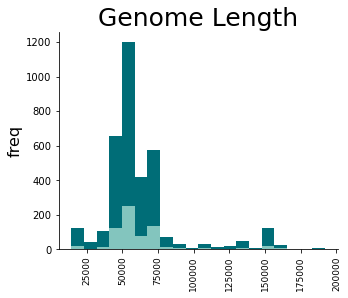

In [96]:
colors = ["#83c5be","#006d77"]
arr = [df_annotated_phages["genome length"].to_numpy(),df_phages[df_phages["is annotated"]==False]["genome length"].to_numpy()]
fig = plt.figure(figsize = (5,4))

plt.hist(arr, 20, stacked=True, color=colors)
#plt.xlabel("Genome Length", fontsize = 16)
plt.xticks(rotation='vertical', fontsize = 9)
plt.ylabel("freq", fontsize = 16)
plt.title("Genome Length", fontsize = 25)
sns.despine()
plt.show()

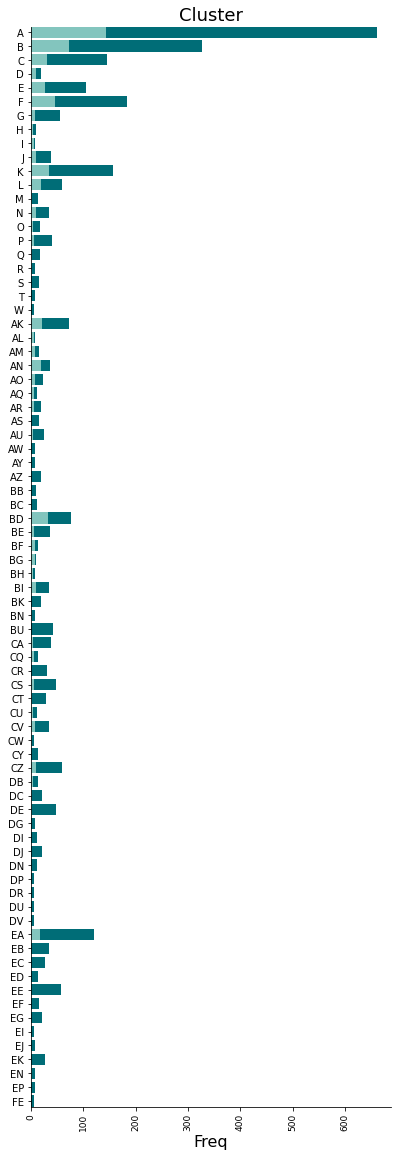

In [108]:
annotated_clusters = list(df_annotated_phages["cluster"].values)
all_clusters = list(df_phages["cluster"].values)

unique_clusters = [i for i in df_phages["cluster"].unique() if all_clusters.count(i)>5]
single_letter_cluster = list(sorted([i for i in unique_clusters if str(i) != 'nan' and len(i)==1],reverse=True))
double_letter_cluster = list(sorted([i for i in unique_clusters if str(i) != 'nan' and len(i)==2],reverse=True))


unique_clusters = double_letter_cluster + single_letter_cluster 


fig = plt.figure(figsize = (5,15))
ax = fig.add_axes([0,0,1,1])

#annotated

cluster_counts = [all_clusters.count(i) for i in unique_clusters]
ax.barh(unique_clusters, cluster_counts, color ="#006d77", label = "unannotated", height=0.8)

# total 
cluster_counts = [annotated_clusters.count(i) for i in unique_clusters]
ax.barh(unique_clusters, cluster_counts, color ="#83c5be", alpha = 1, label = "annotated", height=0.8)
plt.xticks(rotation='vertical', fontsize = 9)
plt.xlabel("Freq", fontsize = 16)
plt.title("Cluster", fontsize = 18)
ax.margins(0.04, 0)  
sns.despine()
plt.show()

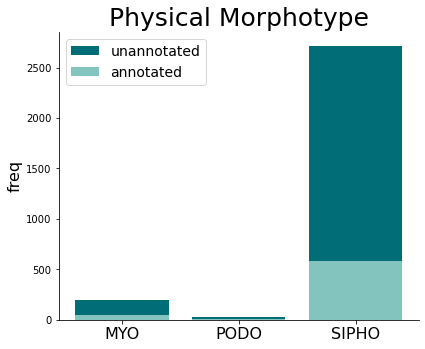

In [91]:
annotated_morphotypes = list(df_annotated_phages["morphotype"].values)
all_morphotypes = list(df_phages["morphotype"].values)

unique_morphotypes = np.sort([x for x in df_phages["morphotype"].unique() if str(x) != 'nan'])[:-1]

fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

#annotated

morphotype_counts = [all_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="#006d77", label = "unannotated", width = 0.8)

# total 
morphotype_counts = [annotated_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="#83c5be", alpha = 1, label = "annotated", width = 0.8)

plt.xticks( fontsize = 16)
# plt.xlabel("Morphotype", fontsize = 16)
plt.ylabel("freq", fontsize = 16)
plt.title("Physical Morphotype", fontsize = 25)
plt.legend(fontsize = 14)
sns.despine()

plt.show()

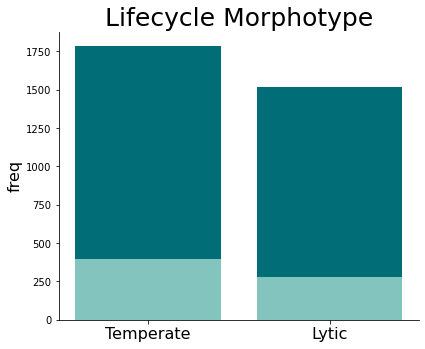

In [92]:
annotated_morphotypes = list(df_annotated_phages["temperate"].values)
all_morphotypes = list(df_phages["temperate"].values)

unique_morphotypes = ['True', 'False']

fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

#annotated

morphotype_counts = [all_morphotypes .count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="#006d77", label = "unannotated", width = 0.8)

# total 
morphotype_counts = [annotated_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="#83c5be", alpha = 1, label = "annotated", width = 0.8)

plt.xticks( fontsize = 16)
# plt.xlabel("Temperate?", fontsize = 16)
plt.ylabel("freq", fontsize = 16)
plt.title("Lifecycle Morphotype", fontsize = 25)
plt.xticks(np.arange(2), ('Temperate', 'Lytic'))
sns.despine()

plt.show()

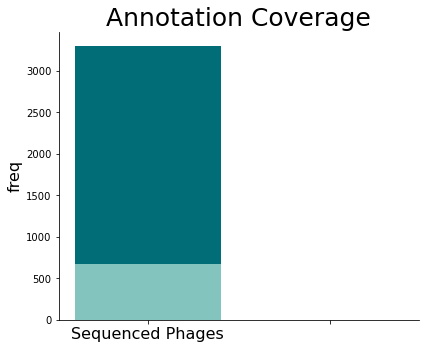

In [95]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

#annotated

morphotype_counts = [all_morphotypes .count(i) for i in unique_morphotypes]
ax.bar(["Sequenced Phages"," "], [sum(morphotype_counts),0], color ="#006d77", label = "unannotated", width = 0.8)

# total 
morphotype_counts = [annotated_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(["Sequenced Phages"," "], [sum(morphotype_counts),1], color ="#83c5be", alpha = 1, label = "annotated", width = 0.8)

plt.xticks( fontsize = 16)
plt.ylabel("freq", fontsize = 16)
plt.xlabel("\n", fontsize = 16)
plt.title("Annotation Coverage", fontsize = 25)
sns.despine()

plt.show()